<a href="https://colab.research.google.com/github/ailunguo/Test/blob/main/Opencv_Test/Image_Processing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

In [4]:
region_img = cv.imread('/content/drive/MyDrive/zhihui/cat_2.jpg', 0)
img = region_img.copy()

# 图像阙值处理

简单阙值处理

对于每个像素，应用相同的阈值。如果像素值小于阈值，则设置为0，否则设置为最大值。

图像应该是灰度图像

In [ ]:
ret, thresh1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
# cv.THRESH_TRUNC
# 如果像素值大于等于阈值，则将像素值保持不变，不做任何改变。小于阈值，将像素值截断为阈值
ret, thresh4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
# 小于阈值，则将像素值设为零。大于等于阈值，则将像素值保持不变
ret, thresh5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)

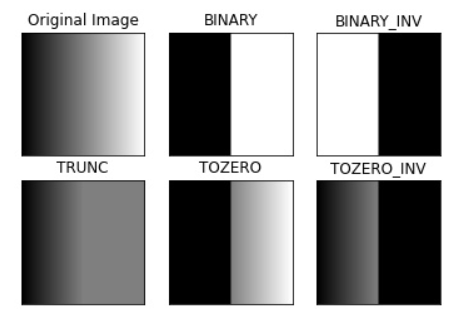

自适应阙值

In [ ]:
img = cv.medianBlur(img, 5) # 对图像进行中值滤波处理，5x5的滤波核
ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)  # 全局阙值处理
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2) # 阈值是邻域区域的平均值减去常数C
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2) # 阈值是邻域值的高斯加权和减去常数C
# 核大小11x11,C=2

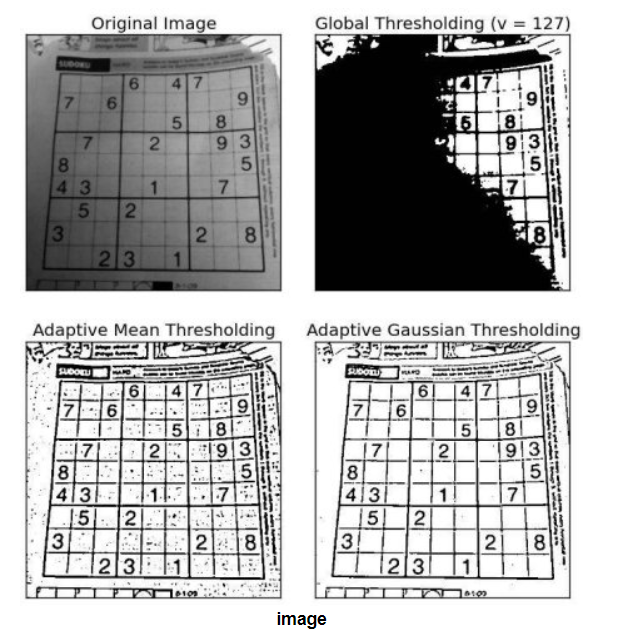

Otsu二值化

Otsu二值化方法从图像直方图确定最佳全局阈值，如果图像的直方图只有两个峰值，

那它应该选择这两个峰值中间的值

In [ ]:
# global thresholding
ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Otsu's thresholding
ret2, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img, (5, 5), 0)
# 对图像进行高斯模糊，(5,5)是高斯核大小，0是标准差，0的模糊效果比较弱
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)



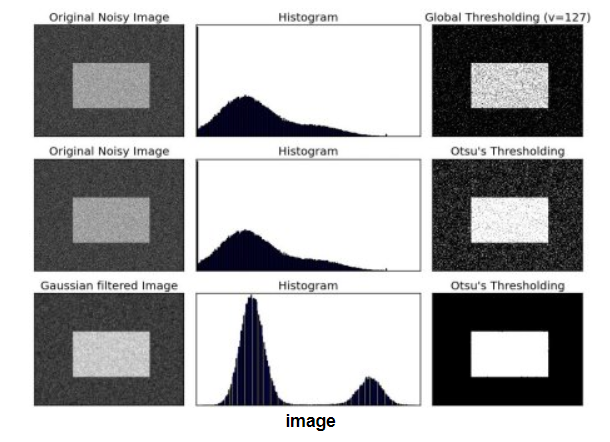